# Introduction

In this project, we are given with a dataset containing various features on customer behavior and a target of credit-card defaulters/non-defaulters. We will analyse the dataset to find the most relevant features that influence the target. In this anamoly detection problem, we will use various sampling techniques to mitigate class imbalance problems. Using supervised model, we will build a classification model, that predicts the defaulters given the features.

# Exploratory data analysis

## Data info

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.columns = [x.lower() for x in df.columns]
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

We see from the info that all the features are numeric. Also, there are no null values in the dataset. The features are abstract with column names `v1` to `v28`. The feature `amount` may indicate the maximum credit. In later stage, we will visualize the distribution to identify what the feature `time` represents.

## Data description

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.00000,94813.85958,47488.14595,0.00000,54201.50000,84692.00000,139320.50000,172792.00000
v1,284807.00000,0.00000,1.95870,-56.40751,-0.92037,0.01811,1.31564,2.45493
v2,284807.00000,0.00000,1.65131,-72.71573,-0.59855,0.06549,0.80372,22.05773
v3,284807.00000,-0.00000,1.51626,-48.32559,-0.89036,0.17985,1.02720,9.38256
v4,284807.00000,0.00000,1.41587,-5.68317,-0.84864,-0.01985,0.74334,16.87534
v5,284807.00000,0.00000,1.38025,-113.74331,-0.69160,-0.05434,0.61193,34.80167
v6,284807.00000,0.00000,1.33227,-26.16051,-0.76830,-0.27419,0.39856,73.30163
v7,284807.00000,-0.00000,1.23709,-43.55724,-0.55408,0.04010,0.57044,120.58949
v8,284807.00000,0.00000,1.19435,-73.21672,-0.20863,0.02236,0.32735,20.00721
v9,284807.00000,-0.00000,1.09863,-13.43407,-0.64310,-0.05143,0.59714,15.59499


## Statistical analysis

In [5]:
moments = df.apply(lambda x: (x.mean(), x.std(), x.skew(), x.kurtosis())).T.set_axis(['mean', 'standard deviation', 'skewness', 'kurtosis'], axis=1)
moments

,mean,standard deviation,skewness,kurtosis
time,94813.85958,47488.14595,-0.03557,-1.29353
v1,0.00000,1.95870,-3.28067,32.48668
v2,0.00000,1.65131,-4.62487,95.77311
v3,-0.00000,1.51626,-2.24016,26.61955
v4,0.00000,1.41587,0.67629,2.63545
v5,0.00000,1.38025,-2.42590,206.90456
v6,0.00000,1.33227,1.82658,42.64249
v7,-0.00000,1.23709,2.55391,405.60742
v8,0.00000,1.19435,-8.52194,220.58697
v9,-0.00000,1.09863,0.55468,3.73131


From the moments, we see that none of the features follow a normal distribution. Most of the features has high kurtosis (leptokurtic) and skewed distribution. We will use Jarque-Bera test to confirm the findings. Jarque-Bera test is a normality test that tests whether the sample data comes from a normal distribution. The null hypothesis is that the data is normally distributed and the alternate hypothesis is that the data is not normally distributed. 

In [6]:
def jb_test(x):
    stat, p = st.jarque_bera(x)
    if p > 0.05:
        res = 'Normally distributed'
    else:
        res = 'Not-normally distributed'
    return stat, p, res

df.apply(jb_test).T.set_axis(['JB-stat', 'p-value', 'Inference'], axis=1)

,JB-stat,p-value,Inference
time,19916.03033,0.00000,Not-normally distributed
v1,13034626.42443,0.00000,Not-normally distributed
v2,109860958.04540,0.00000,Not-normally distributed
v3,8646829.02422,0.00000,Not-normally distributed
v4,104129.38422,0.00000,Not-normally distributed
v5,508279921.01948,0.00000,Not-normally distributed
v6,21736257.78077,0.00000,Not-normally distributed
v7,1952561707.00328,0.00000,Not-normally distributed
v8,580856593.24145,0.00000,Not-normally distributed
v9,179816.44154,0.00000,Not-normally distributed


From the above table, we can conclude that none of the features are normally distributed in the dataset.

# Visualization

## Box-plots with hue

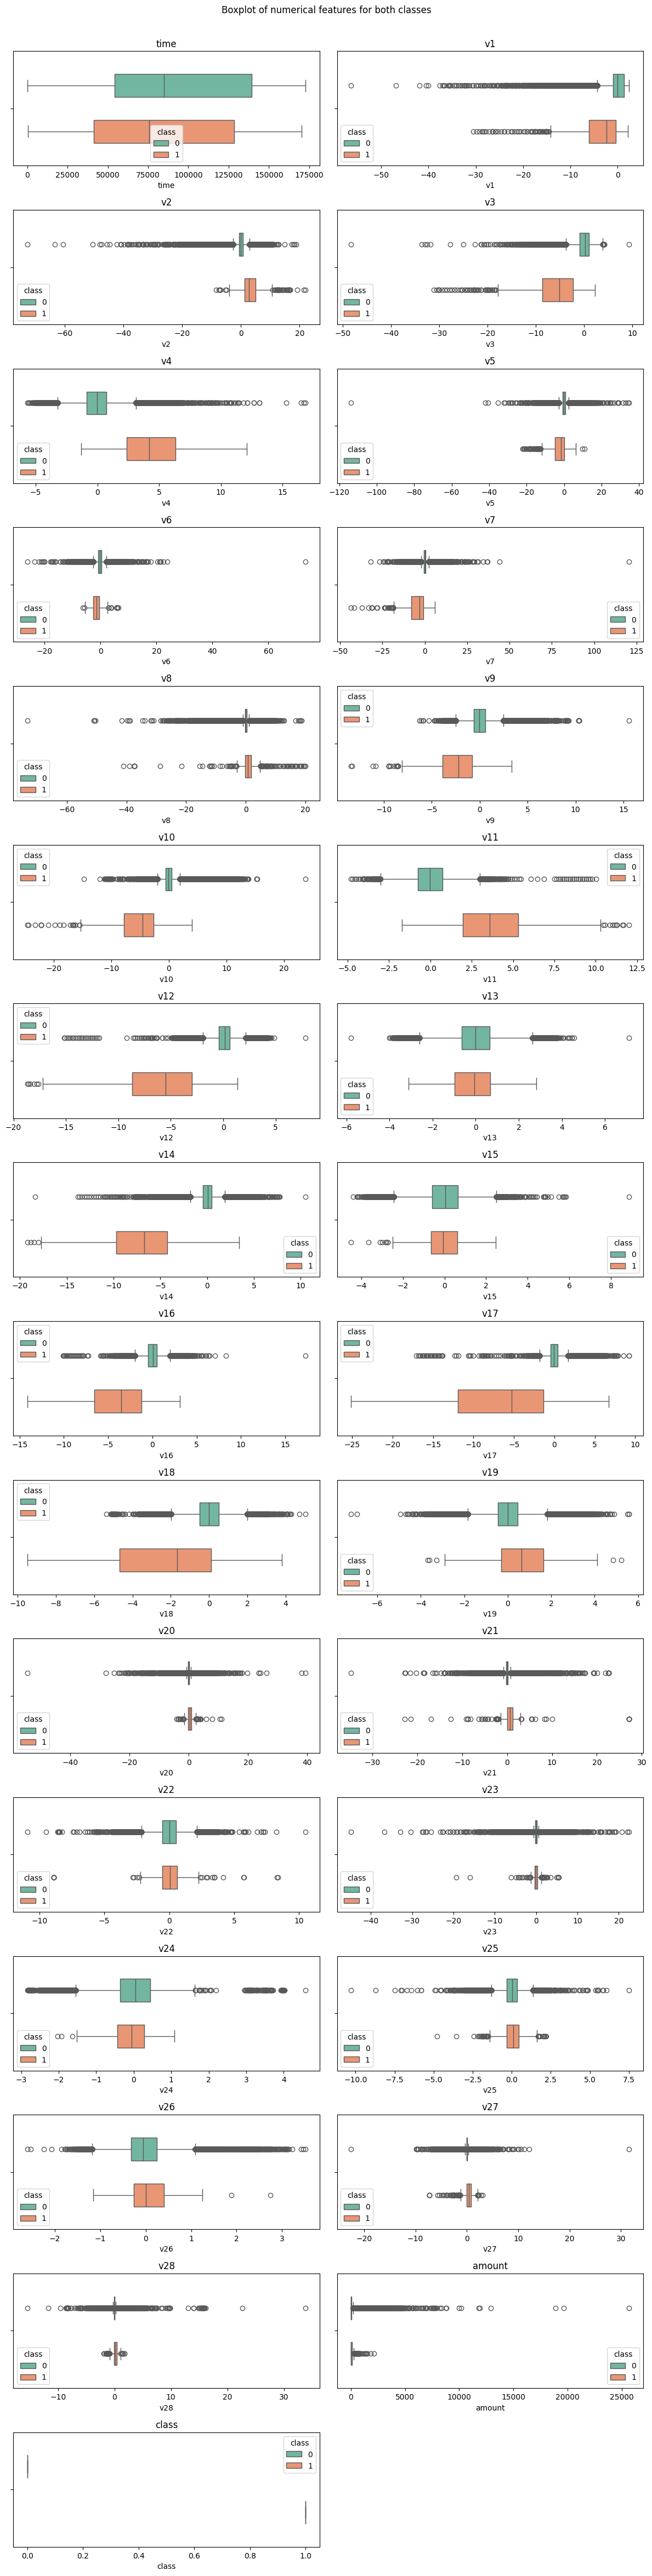

In [7]:
fig, ax = plt.subplots(nrows=len(df.columns)//2+1, ncols=2, figsize=(12, len(df.columns)*1.5))

for ind, col in enumerate(df.columns):
    pos = divmod(ind, 2)
    g = sns.boxplot(data=df, x=col, hue='class', ax=ax[pos], palette='Set2', gap=0.5)
    g.set(title=col)
    g.set(ylabel=None)

if len(df.columns) % 2 != 0:
    fig.delaxes(ax[divmod(len(df.columns), 2)])

plt.tight_layout()

fig.suptitle('Boxplot of numerical features for both classes', y=1.01)
plt.show()

From the boxplot, we can see that the defaulters tend to have low `amount`. To make sure, we do not miss any data-points of the defaulters, we will set a threshold of amount to the maximum of the defaulters and remove all the other datapoints.

In [8]:
df = df[df['amount'] <= df[df['class'] == 1]['amount'].max()]

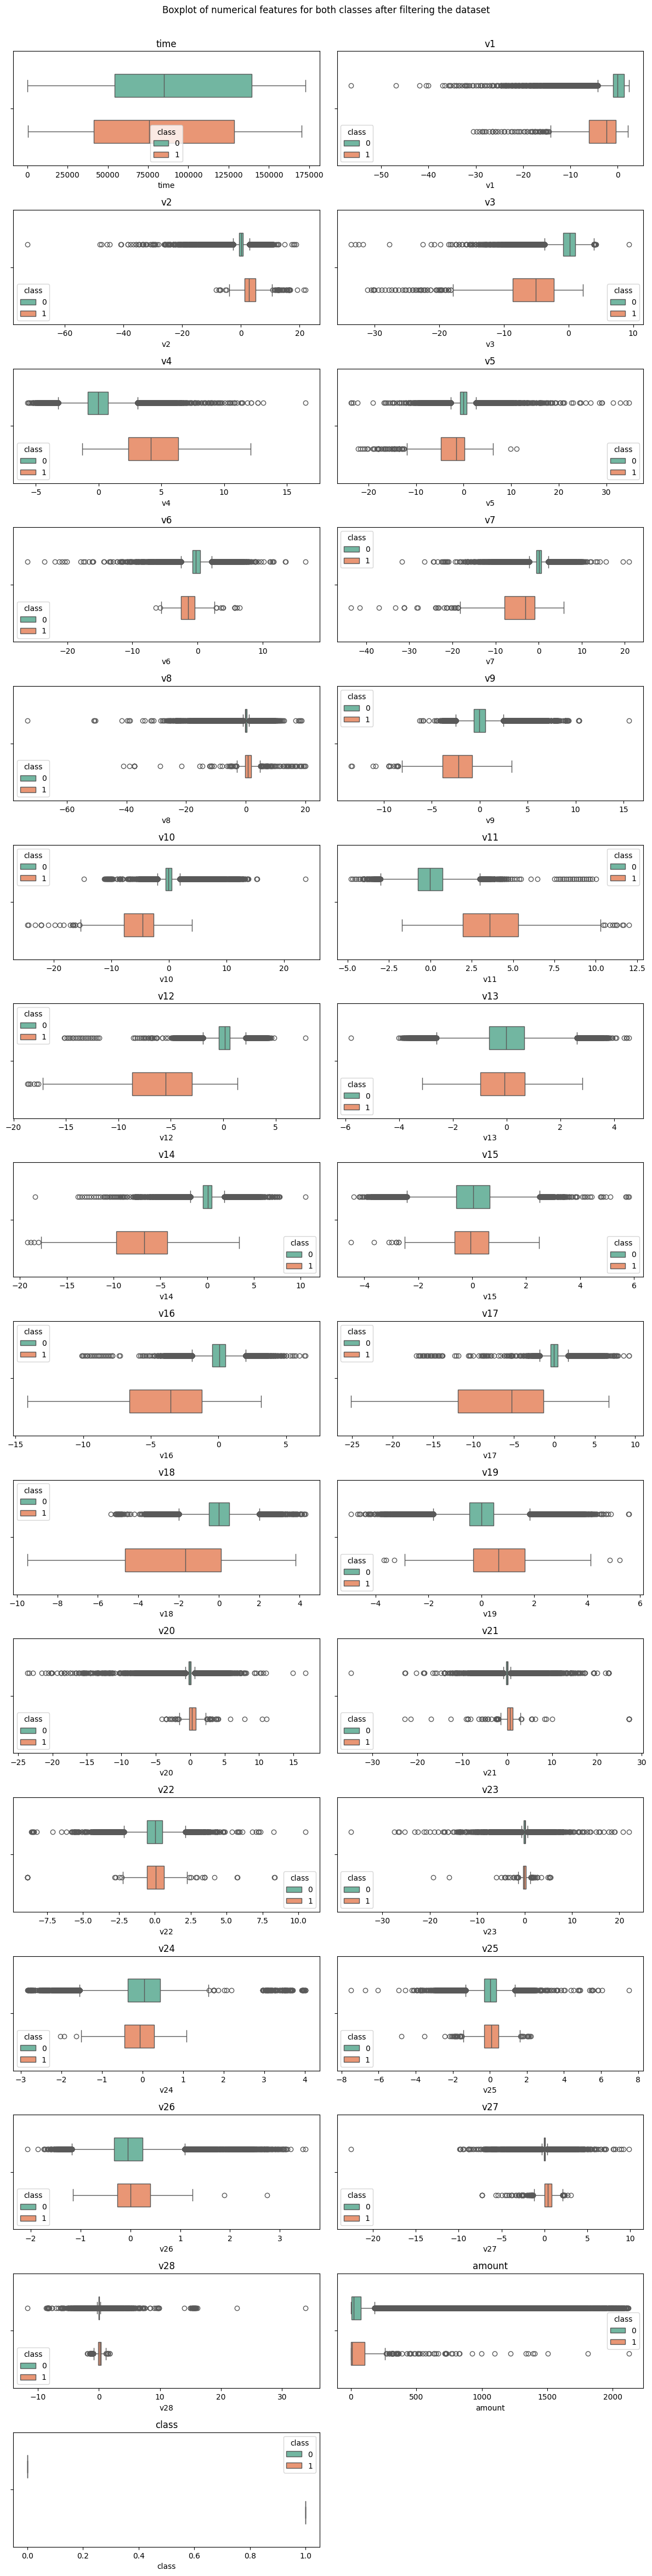

In [9]:
fig, ax = plt.subplots(nrows=len(df.columns)//2+1, ncols=2, figsize=(12, len(df.columns)*1.5))

for ind, col in enumerate(df.columns):
    pos = divmod(ind, 2)
    g = sns.boxplot(data=df, x=col, hue='class', ax=ax[pos], palette='Set2', gap=0.5)
    g.set(title=col)
    g.set(ylabel=None)

if len(df.columns) % 2 != 0:
    fig.delaxes(ax[divmod(len(df.columns), 2)])

plt.tight_layout()

fig.suptitle('Boxplot of numerical features for both classes after filtering the dataset', y=1.01)
plt.show()

## Feature `time`

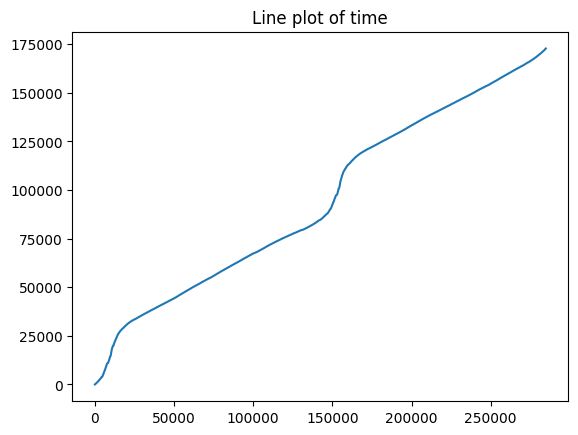

In [10]:
plt.plot(df['time'])
plt.title('Line plot of time');

From the above plot, we infer that the feature `time` is piece-wise linear and may indicate the time of joining of the customer. It is not a useful predictor and will drop it from the dataset.

In [11]:
df.drop(columns='time', inplace=True)

## Countplot of the target

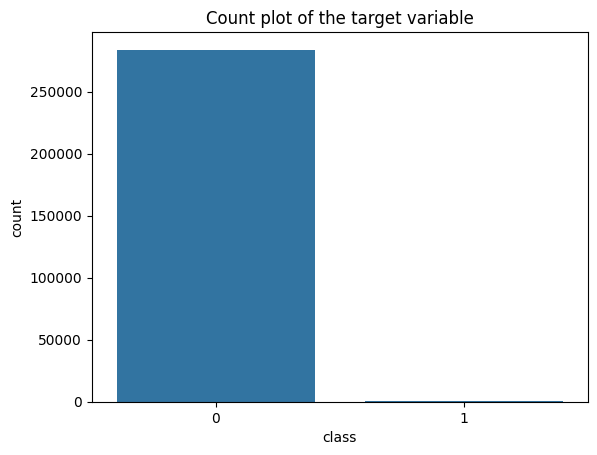

In [12]:
sns.countplot(df, x='class')
plt.title('Count plot of the target variable');

Even after removing the datapoints, there is a huge class imbalance on the target. This can lead to model bias. We will use the sampling techniques to address this issue.

# Model building

In this phase, we will split train and test set, handle class imbalance, build various classifiers and discuss the results.

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

## Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='class'), df['class'], test_size=0.2, random_state=42, stratify=df['class'])

## Logistic regression

In [15]:
metrics = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])

In [16]:
pipe_lr = Pipeline(
    [
        ('sampler', RandomUnderSampler(random_state=42)),
        ('decomposition', PCA()),
        ('kbest', SelectKBest()),
        ('classifier', LogisticRegression())
    ]
)

params_lr = {
    'kbest__k': np.arange(2, 10),
    'classifier__C': np.logspace(-10, 5)
}

model_lr = RandomizedSearchCV(
    estimator=pipe_lr,
    param_distributions=params_lr,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    scoring='recall'
)

model_lr.fit(X_train, y_train)
cm_lr = confusion_matrix(y_test, model_lr.predict(X_test))
metrics.loc['Logistic regression'] = cm_lr.ravel()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


## Decision tree classifier

In [17]:
pipe_dt = Pipeline(
    [
        ('sampler', RandomUnderSampler(random_state=42)),
        ('decomposition', PCA()),
        ('kbest', SelectKBest()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]
)

params_dt = {
    'kbest__k': np.arange(2, 10),
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20),
    'classifier__min_samples_leaf': np.arange(1, 20)
}

model_dt = RandomizedSearchCV(
    estimator=pipe_dt,
    param_distributions=params_dt,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    scoring='recall'
)

model_dt.fit(X_train, y_train)
cm_dt = confusion_matrix(y_test, model_dt.predict(X_test))
metrics.loc['Decision tree'] = cm_dt.ravel()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


## Random forest classifier

In [18]:
pipe_rf = Pipeline(
    [
        ('sampler', RandomUnderSampler(random_state=42)),
        ('decomposition', PCA()),
        ('kbest', SelectKBest()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]
)

params_rf = {
    'kbest__k': np.arange(2, 10),
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20),
    'classifier__min_samples_leaf': np.arange(1, 20)
}

model_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=params_rf,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    scoring='recall'
)

model_rf.fit(X_train, y_train)
cm_rf = confusion_matrix(y_test, model_rf.predict(X_test))
metrics.loc['Random forest'] = cm_rf.ravel()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


## Gradient boosting classifier

In [19]:
pipe_gb = Pipeline(
    [
        ('sampler', RandomUnderSampler(random_state=42)),
        ('decomposition', PCA()),
        ('kbest', SelectKBest()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]
)

params_gb = {
    'kbest__k': np.arange(2, 10),
    'classifier__n_estimators': np.arange(50, 201, 50),
    'classifier__learning_rate': np.logspace(-3, 0, num=4),
    'classifier__max_depth': np.arange(1, 10)
}

model_gb = RandomizedSearchCV(
    estimator=pipe_gb,
    param_distributions=params_gb,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    scoring='recall'
)

model_gb.fit(X_train, y_train)
cm_gb = confusion_matrix(y_test, model_gb.predict(X_test))
metrics.loc['Gradient boosting'] = cm_gb.ravel()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


## Naive bayes classifier

In [20]:
pipe_nb = Pipeline(
    [
        ('sampler', RandomUnderSampler(random_state=42)),
        ('decomposition', PCA()),
        ('kbest', SelectKBest()),
        ('classifier', GaussianNB())
    ]
)

params_nb = {
    'kbest__k': np.arange(2, 10)
}

model_nb = RandomizedSearchCV(
    estimator=pipe_nb,
    param_distributions=params_nb,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    scoring='recall'
)

model_nb.fit(X_train, y_train)
cm_nb = confusion_matrix(y_test, model_nb.predict(X_test))
metrics.loc['Naive Bayes'] = cm_nb.ravel()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


## Discussions

In [21]:
tp = metrics['TP']
tn = metrics['TN']
fp = metrics['FP']
fn = metrics['FN']

metrics['Accuracy'] = (tp + tn) / (tp + tn + fp + fn)
metrics['Precision'] = tp / (tp + fp)
metrics['Recall'] = tp / (tp + fn)

precision = metrics['Precision']
recall = metrics['Recall']

metrics['F1 score'] = (2 * precision * recall) / (precision + recall)

metrics

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 score
Logistic regression,55178,1565,7,91,0.97234,0.05495,0.92857,0.10376
Decision tree,52808,3935,5,93,0.93068,0.02309,0.94898,0.04508
Random forest,54651,2092,7,91,0.96307,0.04169,0.92857,0.07979
Gradient boosting,54258,2485,6,92,0.95618,0.03570,0.93878,0.06879
Naive Bayes,54166,2577,10,88,0.95449,0.03302,0.89796,0.06370


From the above table, we can see that all the models has high recall, since we optimized the hyperparameters based on the recall score. There are only a small number of defaulters being misclassified as the non-defaulters indicated by FN (False negative). But, in the process, there were a large number of non-defaulters being classified as defaulters indicated by FP (False positive) and as a result, all the models have very low precision. As there will always be a trade-off between precision and recall, the end-user must decide the optimization, that they need. Using recall would correctly classify the defaulters, while misclassifying many non-defaulters. If they optimize accuracy, there will be misclassification of few defaulters as non-defaulters, with the intent of increasing the accuracy score.